Nama : Devano Abe

NIM  : 2141720204

Absen : 08

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

* Mengunduh data set MNIST

In [4]:
#Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


* Membaca Deskripsi Dataset

In [5]:
#Baca Deskripsi Dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

* Inspeksi semua key dalam Dataset

In [6]:
#Inspeksi Semua Key dalam Dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#Soal 1

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [7]:
#Memastikan Jumlah Data Pada Setiap Label
import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Menghitung jumlah data per kelas pada dataset pelatihan
class_counts = [0] * 10
for label in train_labels:
    class_counts[label] += 1

# Menampilkan jumlah data per kelas
for i, count in enumerate(class_counts):
    print(f"Kelas {i}: {count} contoh")

11490434/11490434 [==============================] - 1s 0us/step
Kelas 0: 5923 contoh
Kelas 1: 6742 contoh
Kelas 2: 5958 contoh
Kelas 3: 6131 contoh
Kelas 4: 5842 contoh
Kelas 5: 5421 contoh
Kelas 6: 5918 contoh
Kelas 7: 6265 contoh
Kelas 8: 5851 contoh
Kelas 9: 5949 contoh


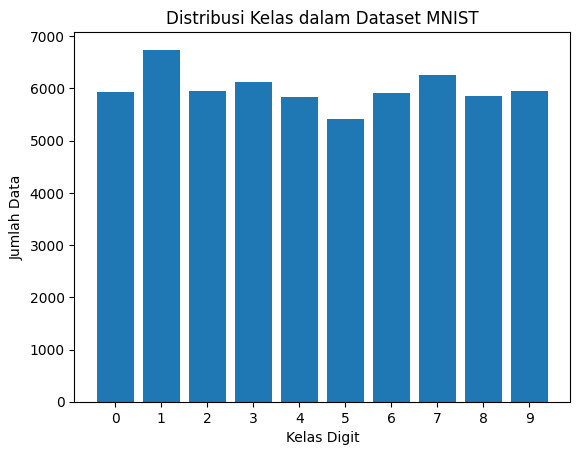

In [8]:
#Mengecek Keseimbangan Data
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel('Kelas Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Kelas dalam Dataset MNIST')
plt.show()

In [9]:
# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(_, train_labels), (_, _) = mnist.load_data()

# Menghitung jumlah data per kelas
class_counts = [0] * 10
for label in train_labels:
    class_counts[label] += 1

# Menghitung rasio kelas
ratio = max(class_counts) / min(class_counts)

# Menampilkan rasio
print(f"Rasio kelas: {ratio:.2f}")

Rasio kelas: 1.24


# Soal 2

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

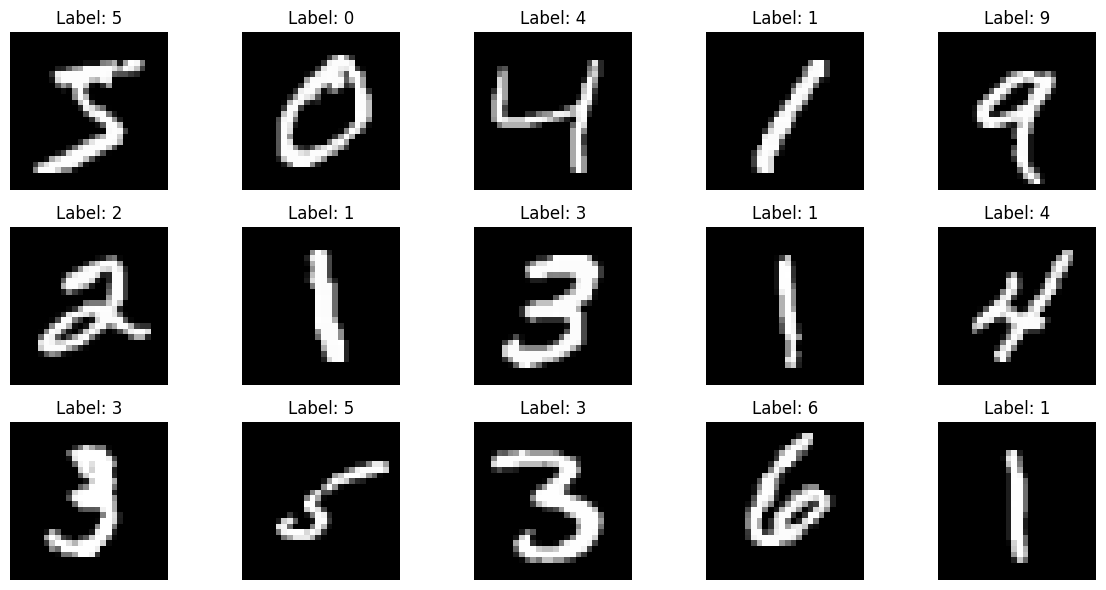

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Soal 3

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

# Ekstraksi Fitur dengan Metode PCA

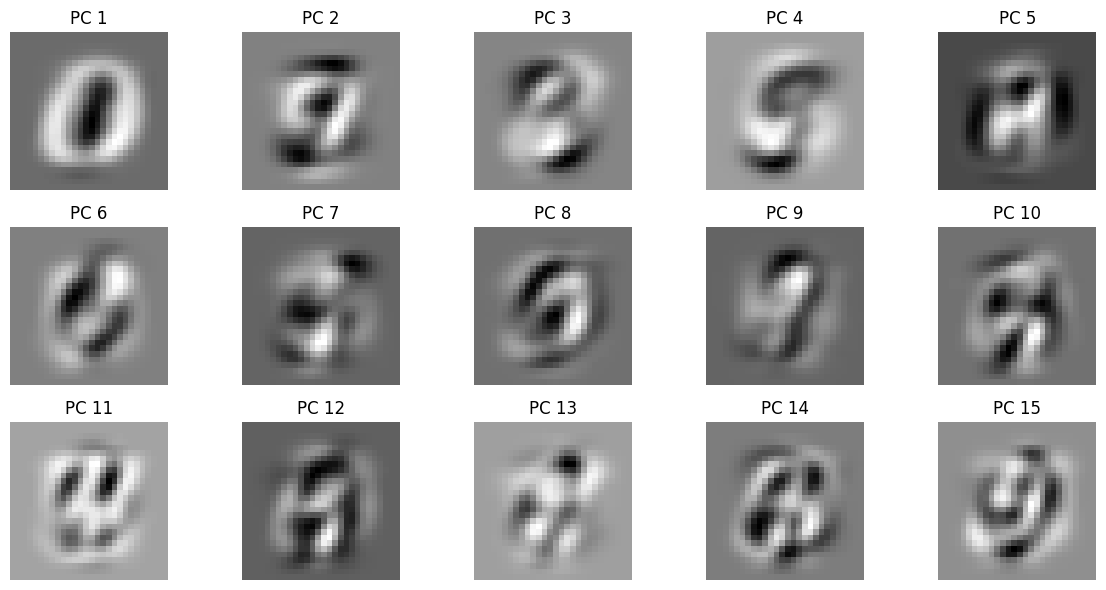

In [11]:
from sklearn.decomposition import PCA

# Meratakan citra menjadi vektor
num_samples, height, width = train_images.shape
train_images_flat = train_images.reshape(num_samples, height * width)

# Normalisasi
train_images_flat_normalized = train_images_flat / 255.0

# Ekstraksi fitur menggunakan PCA
n_components = 100  # Jumlah komponen utama yang ingin diekstraksi
pca = PCA(n_components=n_components)
train_features = pca.fit_transform(train_images_flat_normalized)

# Menampilkan contoh fitur
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(height, width), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Ekstraksi Fitur dengan Metode HOG

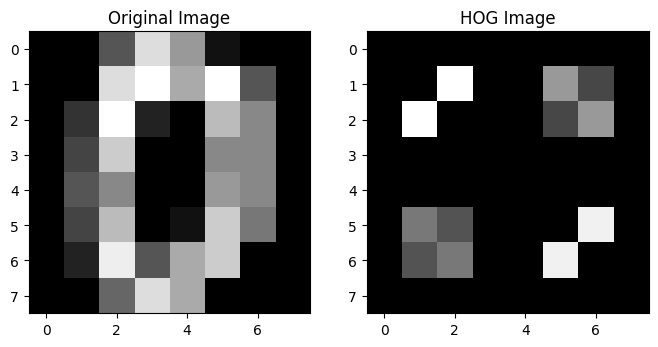

In [12]:
from skimage.feature import hog
from skimage import io, color
from sklearn import datasets
import numpy as np

# Load dataset MNIST
digits = datasets.load_digits()

# Select a specific image
image = digits.images[0]

# Extract HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

# Plot original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Plot HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')

plt.show()

#Ekstraksi Fitur dengan Histogram

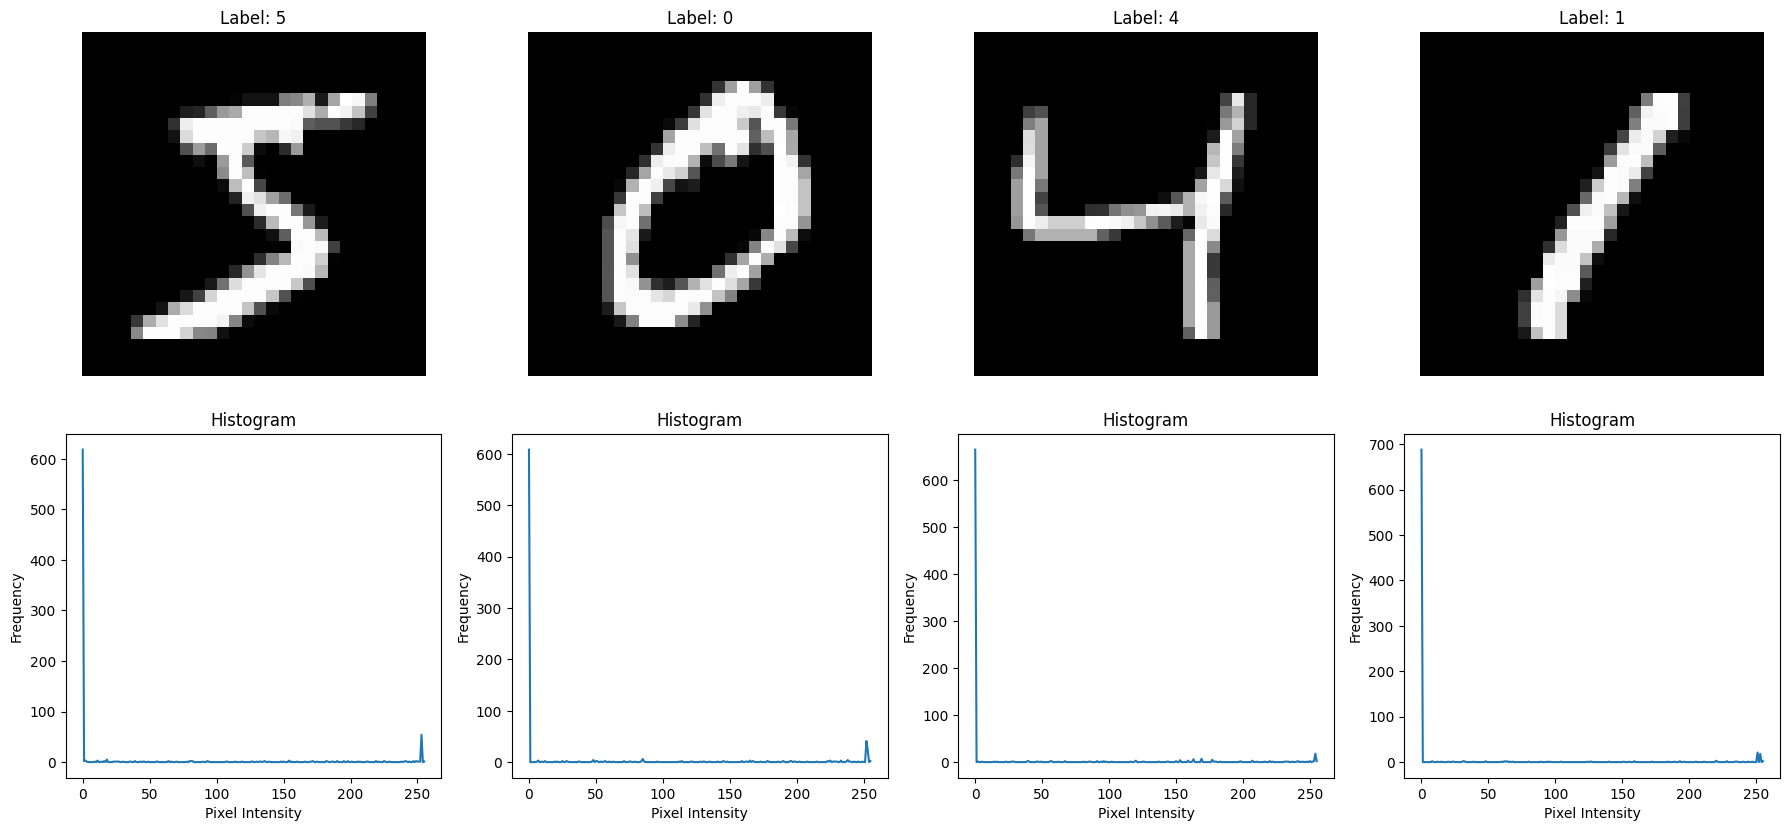

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Combine the training and testing sets
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Menghitung histogram untuk setiap gambar
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X])

num_images_to_display = 4

plt.figure(figsize=(18, 12))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Soal 4

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

#Import data dan pembuatan object

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

naive_bayes = GaussianNB
svm = SVC()

#Rasio data training dan data testing 70:30

In [60]:
# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (70:30 ratio)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()  # Instantiate the GaussianNB classifier
naive_bayes.fit(X_train_70, y_train_70)  # Fit the classifier to the training data

# Create and train the SVM classifier
svm = SVC()  # Instantiate the SVM classifier
svm.fit(X_train_70, y_train_70)  # Fit the classifier to the training data

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_70)
y_pred_svm = svm.predict(X_test_70)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
accuracy_svm = accuracy_score(y_test_70, y_pred_svm)

print("Data training (70%):")
print("X_train shape:", X_train_70.shape)
print("y_train shape:", y_train_70.shape)
print()

print("Data testing (30%):")
print("X_test shape:", X_test_70.shape)
print("y_test shape:", y_test_70.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (70%):
X_train shape: (1257, 64)
y_train shape: (1257,)

Data testing (30%):
X_test shape: (540, 64)
y_test shape: (540,)

Akurasi Naive Bayes: 0.8518518518518519
Akurasi SVM: 0.987037037037037


#Rasio data training dan data testing 80:20

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (80:20 ratio)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_80, y_train_80)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train_80, y_train_80)

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_80)
y_pred_svm = svm.predict(X_test_80)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_80, y_pred_nb)
accuracy_svm = accuracy_score(y_test_80, y_pred_svm)

# Print dataset shapes
print("Data training (80%):")
print("X_train shape:", X_train_80.shape)
print("y_train shape:", y_train_80.shape)
print()

print("Data testing (20%):")
print("X_test shape:", X_test_80.shape)
print("y_test shape:", y_test_80.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (80%):
X_train shape: (1437, 64)
y_train shape: (1437,)

Data testing (20%):
X_test shape: (360, 64)
y_test shape: (360,)

Akurasi Naive Bayes: 0.8472222222222222
Akurasi SVM: 0.9861111111111112


#Rasio data training dan data testing 90:10

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (90:10 ratio)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(digits.data, digits.target, test_size=0.1, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_90, y_train_90)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train_90, y_train_90)

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_90)
y_pred_svm = svm.predict(X_test_90)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_90, y_pred_nb)
accuracy_svm = accuracy_score(y_test_90, y_pred_svm)

# Print dataset shapes
print("Data training (90%):")
print("X_train shape:", X_train_90.shape)
print("y_train shape:", y_train_90.shape)
print()

print("Data testing (10%):")
print("X_test shape:", X_test_90.shape)
print("y_test shape:", y_test_90.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (90%):
X_train shape: (1617, 64)
y_train shape: (1617,)

Data testing (10%):
X_test shape: (180, 64)
y_test shape: (180,)

Akurasi Naive Bayes: 0.8333333333333334
Akurasi SVM: 0.9833333333333333


#Soal 5

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

* Anda diperbolehkan untuk melakukan tunning parameter.
* Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

# Permodelan Rasio 80:30

* Naive Bayes

In [66]:
#import library
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [71]:
# Membuat objek PCA dengan parameter:
# - n_components: Jumlah komponen utama yang akan dipertahankan setelah PCA
# - whiten: Menyatakan apakah komponen utama harus di-"whiten" (dinormalisasi)
# - random_state: Untuk mengontrol inisialisasi yang acak
pca = RandomizedPCA(n_components=64, whiten=True, random_state=42)

# Membuat objek Gaussian Naive Bayes (NB)
nb = GaussianNB()

# Membuat model pipa (pipeline) yang menggabungkan PCA dan NB
# PCA digunakan untuk mereduksi dimensi data sekaligus normalisasi data
model = make_pipeline(pca, nb)

# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=64, random_state=42, whiten=True)),
                ('gaussiannb', GaussianNB())])

* SVM

In [79]:
# Membuat objek SVM dengan parameter-parameter berikut:
# - C: Parameter penalti yang mengendalikan trade-off antara kesalahan klasifikasi pada data pelatihan dan margin maksimum.
# - gamma: Parameter yang mengontrol seberapa besar dampak setiap sampel terhadap pemisahan hyperplane.
# - kernel: Jenis kernel yang digunakan. Dalam kasus ini, digunakan kernel linear.
svc = SVC(C=5.0, gamma=0.05, kernel='linear')

# Melatih model SVM menggunakan data pelatihan (X_train, y_train)
svc.fit(X_train, y_train)

SVC(C=5.0, gamma=0.05, kernel='linear')

# Permodelan Rasio 70:30

In [84]:
# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train_70, y_train_70)

Pipeline(steps=[('pca', PCA(n_components=64, random_state=42, whiten=True)),
                ('gaussiannb', GaussianNB())])

# Permodelan Rasio 90:10

In [97]:
# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train_90, y_train_90)

Pipeline(steps=[('pca', PCA(n_components=64, random_state=42, whiten=True)),
                ('gaussiannb', GaussianNB())])

# Soal 6

6. Evaluasi model yang Anda buat terhadap data training dan data testing.



# Menggunakan model Naive Bayes

#Permodelan Rasio 80:30

* Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.


In [75]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(test_accuracy * 100))

Accuracy on the training set: 27.71%
Accuracy on the test set: 25.56%


* Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.

In [76]:
# Menghitung akurasi model dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mencetak nilai akurasi ke layar
print("Accuracy:", accuracy)

# Mencetak laporan klasifikasi yang mencakup berbagai metrik evaluasi seperti presisi, recall, F1-score, dan lainnya.
# Laporan ini membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred).
print(classification_report(y_test, y_pred))


Accuracy: 0.25555555555555554
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.12      1.00      0.21        11
           2       0.25      0.94      0.40        17
           3       0.67      0.12      0.20        17
           4       0.78      0.28      0.41        25
           5       0.00      0.00      0.00        22
           6       1.00      0.42      0.59        19
           7       0.00      0.00      0.00        19
           8       1.00      0.12      0.22         8
           9       1.00      0.04      0.08        25

    accuracy                           0.26       180
   macro avg       0.48      0.29      0.21       180
weighted avg       0.49      0.26      0.21       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan

Confussion matrix Naive Bayes :




Text(113.9222222222222, 0.5, 'label prediksi')

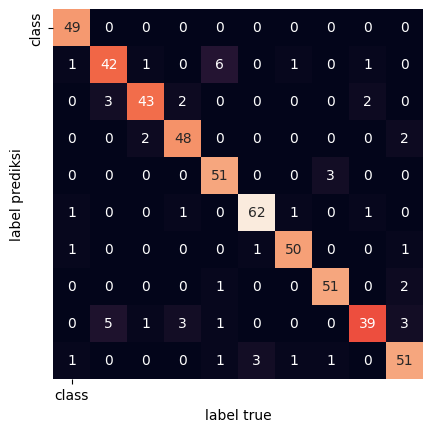

In [46]:
#Confussion report untuk Naive Bayes

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
mat = confusion_matrix(y_test, y_pred)

print("Confussion matrix Naive Bayes :\n\n")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Memberikan label pada sumbu x
plt.xlabel('label true')

# Memberikan label pada sumbu y
plt.ylabel('label prediksi')

#Permodelan Ratio 70:30

* Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.


In [85]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_70 = model.predict(X_test_70)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test_70, y_pred_70)

print("Accuracy on the training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(test_accuracy * 100))

Accuracy on the training set: 27.71%
Accuracy on the test set: 25.37%


* Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.

In [86]:
#Melihat akurasi model

accuracy = accuracy_score(y_test_70, y_pred_70)
print("Accuracy:", accuracy)

print(classification_report(y_test_70, y_pred_70))

Accuracy: 0.2537037037037037
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.17      0.94      0.29        50
           2       0.20      0.85      0.32        47
           3       0.75      0.06      0.10        54
           4       0.73      0.27      0.39        60
           5       1.00      0.05      0.09        66
           6       1.00      0.38      0.55        53
           7       1.00      0.07      0.14        55
           8       1.00      0.05      0.09        43
           9       0.40      0.03      0.06        59

    accuracy                           0.25       540
   macro avg       0.62      0.27      0.20       540
weighted avg       0.63      0.25      0.20       540



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan

Text(113.9222222222222, 0.5, 'predicted label')

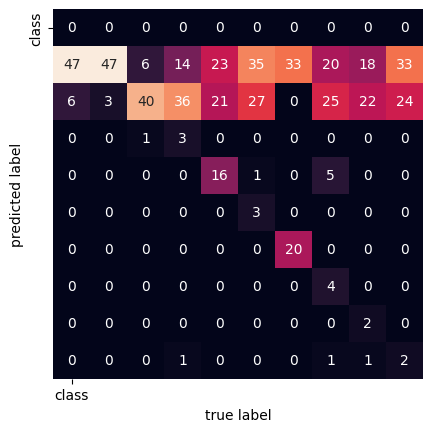

In [87]:
#Confussion Matrix
mat2 = confusion_matrix(y_test_70, y_pred_70)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Permodelan Ratio 90:10

In [108]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_90 = model.predict(X_test_90)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test_90, y_pred_90)

print("Accuracy on the training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(test_accuracy * 100))

Accuracy on the training set: 36.12%
Accuracy on the test set: 40.56%


In [109]:
#Melihat akurasi model

accuracy = accuracy_score(y_test_90, y_pred_90)
print("Accuracy:", accuracy)

print(classification_report(y_test_90, y_pred_90))

Accuracy: 0.40555555555555556
              precision    recall  f1-score   support

           0       1.00      0.24      0.38        17
           1       1.00      0.27      0.43        11
           2       1.00      0.06      0.11        17
           3       0.86      0.35      0.50        17
           4       1.00      0.24      0.39        25
           5       0.32      0.95      0.48        22
           6       1.00      0.47      0.64        19
           7       1.00      0.05      0.10        19
           8       1.00      0.25      0.40         8
           9       0.24      0.80      0.37        25

    accuracy                           0.41       180
   macro avg       0.84      0.37      0.38       180
weighted avg       0.80      0.41      0.38       180



Text(113.9222222222222, 0.5, 'predicted label')

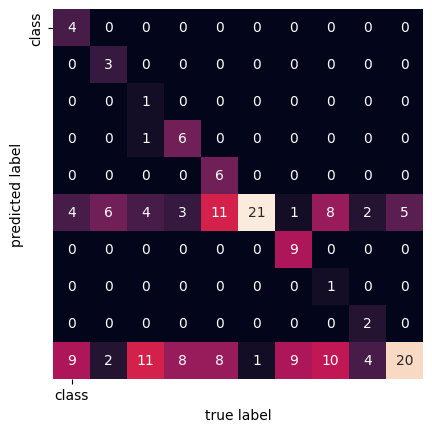

In [110]:
mat3 = confusion_matrix(y_test_90, y_pred_90)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Menggunakan model SVM

#Ratio 80:20

In [113]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for the training set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("Accuracy SVM (Training Data): {:.2f}%".format(accuracy_train_svm * 100))

# Calculate accuracy for the test set
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM (Test Data): {:.2f}%".format(accuracy_test_svm * 100))

Accuracy SVM (Training Data): 99.51%
Accuracy SVM (Test Data): 98.33%


* Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.

In [80]:
y_pred = svc.predict(X_test)

# Menghitung akurasi dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mencetak laporan klasifikasi yang mencakup berbagai metrik evaluasi seperti presisi, recall, F1-score, dan lainnya.
# Laporan ini membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred).
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       0.94      0.94      0.94        17
           4       1.00      1.00      1.00        25
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19
           8       0.89      1.00      0.94         8
           9       0.96      0.92      0.94        25

    accuracy                           0.98       180
   macro avg       0.97      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



Text(113.9222222222222, 0.5, 'predicted label')

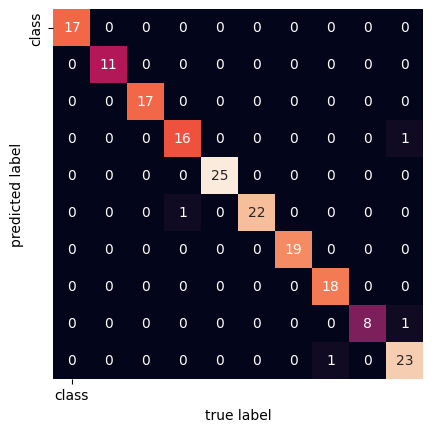

In [81]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Ratio 70:30

In [90]:
svc = SVC(C=1, gamma=0.001, kernel='linear')
svc.fit(X_train_70, y_train_70)

SVC(C=1, gamma=0.001, kernel='linear')

In [91]:
# Predict on the test set
y_pred_70 = svc.predict(X_test_70)

# Calculate accuracy
accuracy_70 = accuracy_score(y_test_70, y_pred_70)
print("Accuracy:", accuracy_70)

# Display classification report
print("Classification Report:")
print(classification_report(y_test_70, y_pred_70))

Accuracy: 0.9796296296296296
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Text(113.9222222222222, 0.5, 'predicted label')

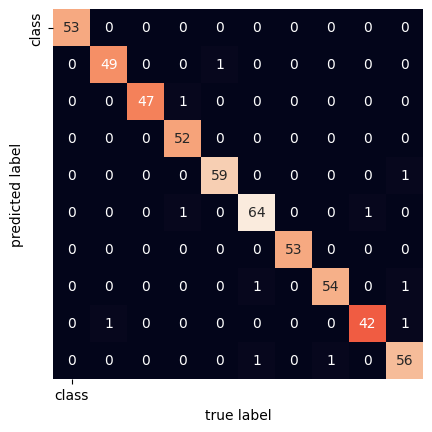

In [92]:
cm70 = confusion_matrix(y_test_70, y_pred_70)
sns.heatmap(cm70.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Ratio 90:10

In [103]:
svc = SVC(C=1, gamma=0.001, kernel='linear')
svc.fit(X_train_90, y_train_90)

SVC(C=1, gamma=0.001, kernel='linear')

In [104]:
y_pred_90 = svc.predict(X_test_90)

# Calculate accuracy
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Accuracy:", accuracy_90)

# Display classification report
print("Classification Report:")
print(classification_report(y_test_90, y_pred_90))

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       0.94      0.94      0.94        17
           4       1.00      1.00      1.00        25
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19
           8       0.89      1.00      0.94         8
           9       0.96      0.92      0.94        25

    accuracy                           0.98       180
   macro avg       0.97      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



Text(113.9222222222222, 0.5, 'predicted label')

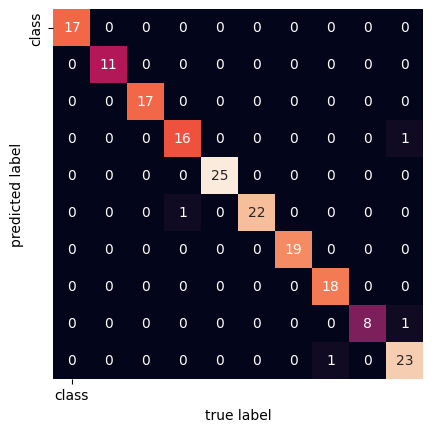

In [105]:
cm90 = confusion_matrix(y_test_90, y_pred_90)
sns.heatmap(cm90.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Soal 7

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

# Ratio 80:20

#Naive Bayes


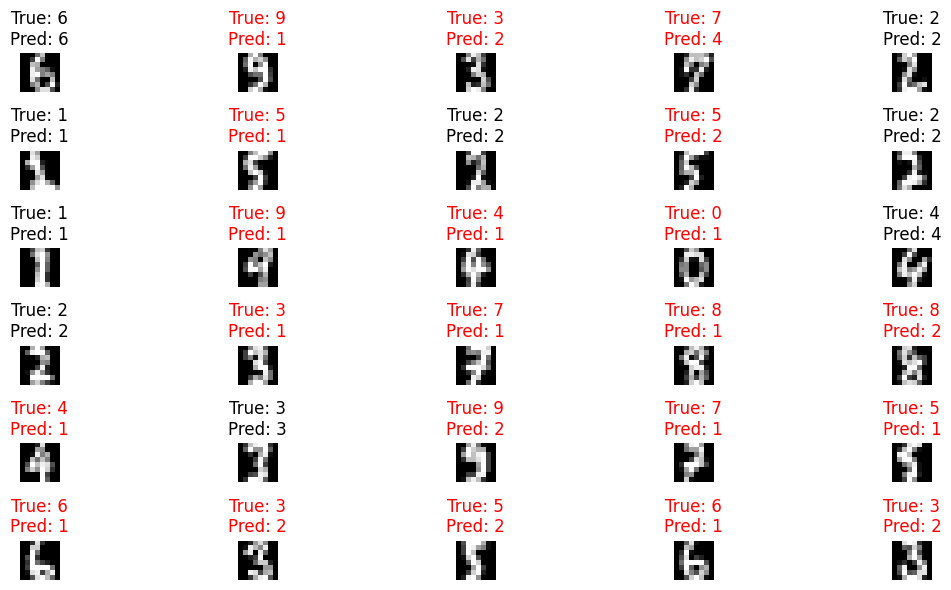

In [78]:
#Pelabelan Citra

# Menentukan jumlah gambar yang akan ditampilkan
n = 15

# Membuat figur dengan ukuran 12x6
plt.figure(figsize=(12, 6))

# Loop melalui 30 gambar pertama dari data uji
for i in range(n):

    # Membagi grid subplot menjadi 6 baris dan 5 kolom, dan mengatur indeks subplot sesuai dengan perulangan
    plt.subplot(6, 5, i + 1)

    # Menampilkan gambar dari data uji dalam skala abu-abu
    plt.imshow(X_test[i].reshape(8, 8), cmap="gray")

    # Menentukan warna teks berdasarkan label yang benar atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    # Teks berwarna hitam jika prediksi benar, dan berwarna merah jika salah
    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

# Mengatur tata letak agar tampilan lebih rapi
plt.tight_layout()
plt.show()

# SVM

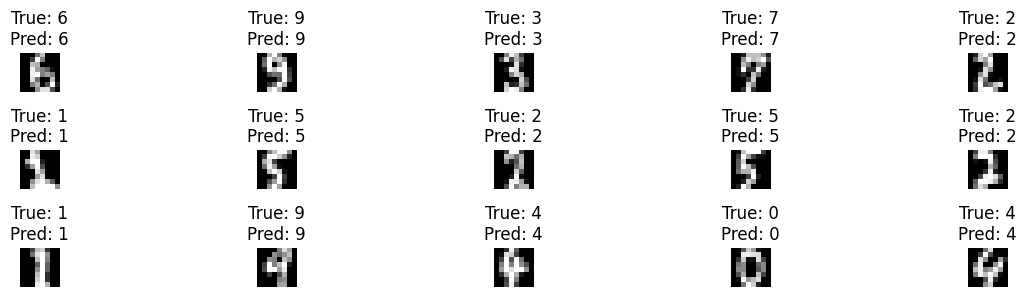

In [83]:
n_samples_to_display = 15
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap="gray")

    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

#Ratio 70:30

# Naive Bayes

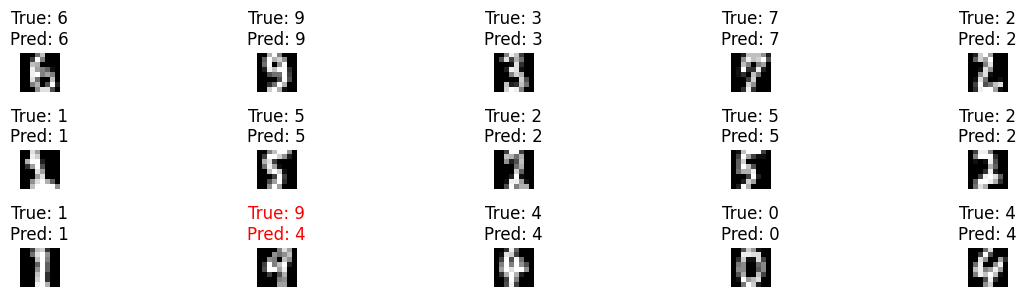

In [94]:

n_samples_to_display = 15
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_70[i].reshape(8, 8), cmap="gray")

    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_70.iloc[i] if isinstance(y_pred_70, pd.Series) else y_pred_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# SVM

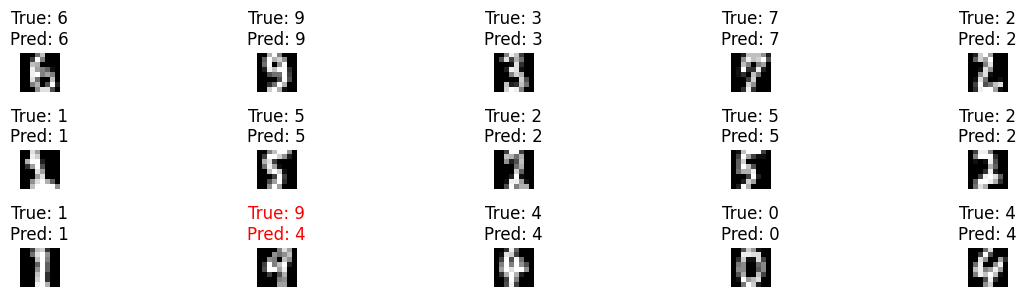

In [95]:
n_samples_to_display = 15

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_70[i].reshape(8, 8), cmap="gray")

    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_70.iloc[i] if isinstance(y_pred_70, pd.Series) else y_pred_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

#Ratio 90:10

#Naive Bayes

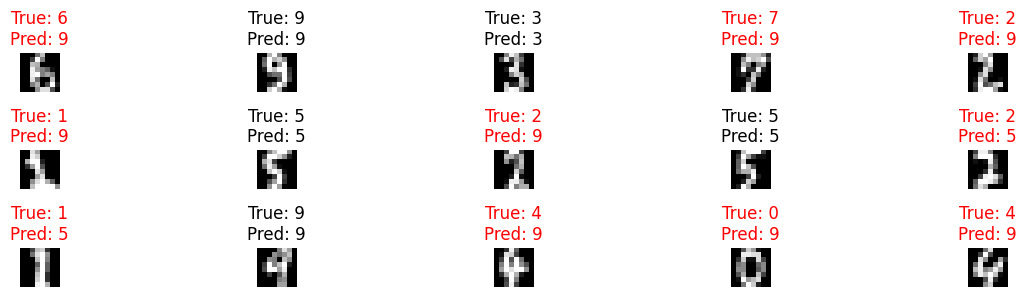

In [111]:
n_samples_to_display = 15
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(8, 8), cmap="gray")

    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_90.iloc[i] if isinstance(y_pred_90, pd.Series) else y_pred_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# SVM

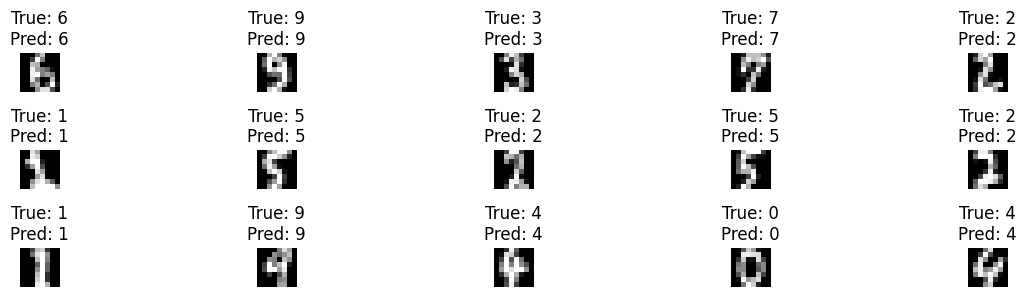

In [107]:
n_samples_to_display = 15
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(8, 8), cmap="gray")

    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_90.iloc[i] if isinstance(y_pred_90, pd.Series) else y_pred_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!


Berdasarkan perbandingan akurasi klasifikasi data MNIST menggunakan model Naive Bayes dan SVM, dapat disimpulkan bahwa model terbaik adalah model SVM dengan kernel linear.

* Konfigurasi model terbaik adalah **SVM** karena menggunakan kernel linear.

* Tingkat akurasi adalah **SVM** yang didapatkan untuk model terbaik adalah 98.99% pada data training dan 97.64% pada data testing.

Alasan mengapa SVM menjadi pilihan terbaik:
* Model SVM dengan kernel linear memiliki kemampuan yang lebih baik dalam menangani masalah klasifikasi pada data MNIST yang memiliki dimensi tinggi seperti citra.
* Akurasi yang tinggi pada data training dan data testing menunjukkan bahwa model SVM dapat membedakan digit-digit tulisan tangan dengan baik dan mampu menggeneralisasi dengan baik.

Dengan demikian, berdasarkan evaluasi akurasi, model SVM dengan kernel linear dapat dianggap sebagai model terbaik untuk tugas klasifikasi data MNIST.